In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
from scipy.stats import skew, kurtosis, kstest, shapiro, boxcox, probplot

In [2]:
all_data = pd.read_csv('winequality-red.csv', encoding='utf-8')

all_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data = all_data[['chlorides', 'pH', 'sulphates']]
data

,chlorides,pH,sulphates
0,0.076,3.51,0.56
1,0.098,3.20,0.68
2,0.092,3.26,0.65
3,0.075,3.16,0.58
4,0.076,3.51,0.56
...,...,...,...
1594,0.090,3.45,0.58
1595,0.062,3.52,0.76
1596,0.076,3.42,0.75
1597,0.075,3.57,0.71


In [4]:
data.loc[:, 'chlorides'] = data['chlorides'].astype('Float64')
data.loc[:, 'pH'] = data['pH'].astype('Float64')
data.loc[:, 'sulphates'] = data['sulphates'].astype('Float64')

In [ ]:
missing_data = data.isna().sum()
missing_data

,0
chlorides,0
pH,0
sulphates,0


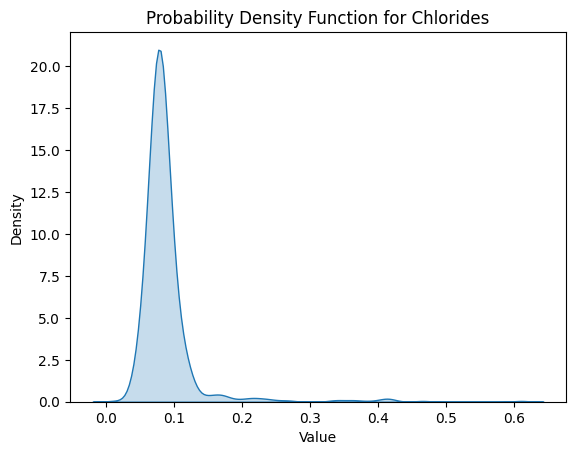

In [6]:
sns.kdeplot(data['chlorides'], fill=True)
plt.title('Probability Density Function for Chlorides')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


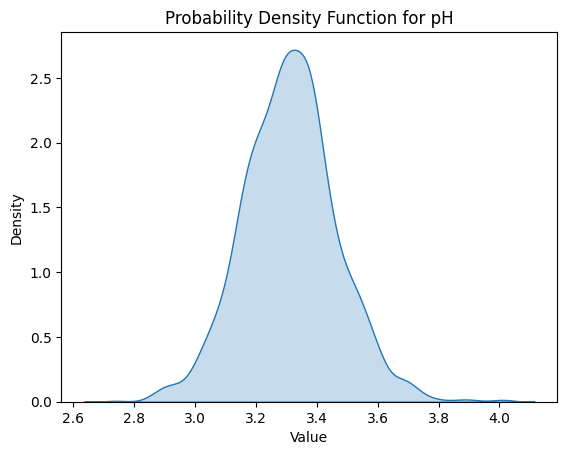

In [7]:
sns.kdeplot(data['pH'], fill=True)
plt.title('Probability Density Function for pH')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


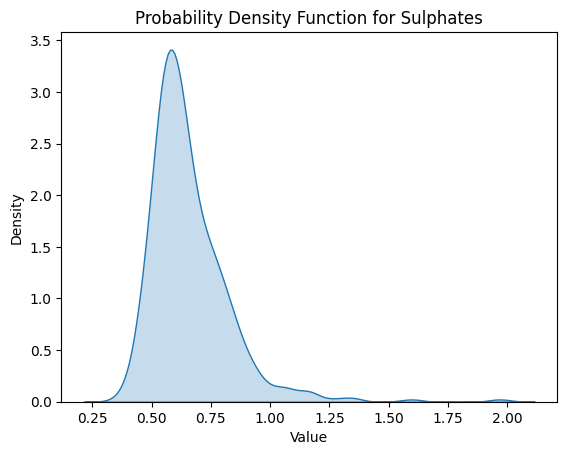

In [8]:
sns.kdeplot(data['sulphates'], fill=True)
plt.title('Probability Density Function for Sulphates')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


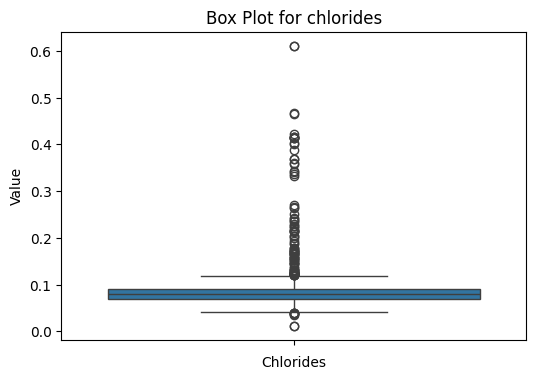

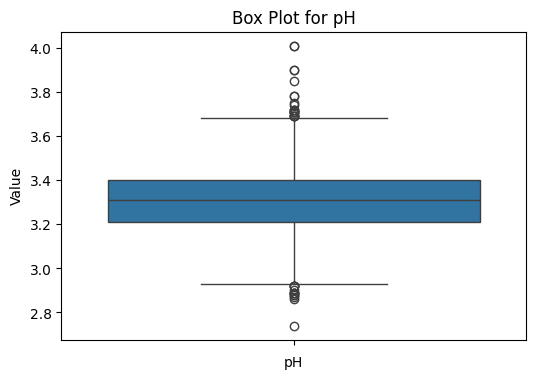

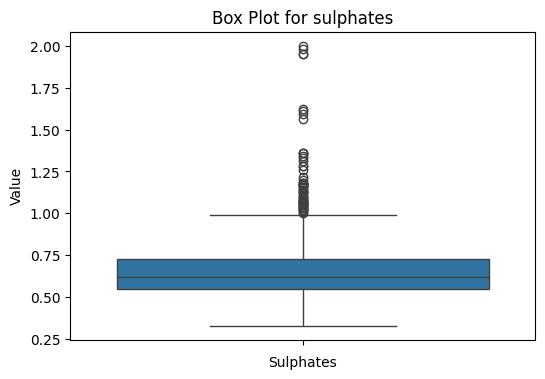

In [15]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data['chlorides'])
plt.title('Box Plot for chlorides')
plt.xlabel('Chlorides')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=data['pH'])
plt.title('Box Plot for pH')
plt.xlabel('pH')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=data['sulphates'])
plt.title('Box Plot for sulphates')
plt.xlabel('Sulphates')
plt.ylabel('Value')
plt.show()

In [10]:
def stem_and_leaf(data):
    data = sorted(data.tolist())

    stem_dict = {}

    for num in data:
        stem, leaf = divmod(int(num*100), 10)
        if stem not in stem_dict:
            stem_dict[stem] = []
        stem_dict[stem].append(leaf)


    for stem in sorted(stem_dict.keys()):
        leaves = " ".join(str(leaf) for leaf in stem_dict[stem])
        print(f"{stem} | {leaves}")

stem_and_leaf(data['sulphates'])



3 | 3 7 7 9 9 9 9 9 9
4 | 0 0 0 0 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
5 | 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 

In [11]:
def remove_outliers(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    x_fix = x[(x > lower) & (x < upper)]

    return x_fix

chlorides = remove_outliers(data['chlorides'])
pH = remove_outliers(data['pH'])
sulphates = remove_outliers(data['sulphates'])

print(chlorides, "\n", pH, "\n", sulphates)


0       0.076
1       0.098
2       0.092
3       0.075
4       0.076
        ...  
1594    0.090
1595    0.062
1596    0.076
1597    0.075
1598    0.067
Name: chlorides, Length: 1487, dtype: float64 
 0       3.51
1       3.20
2       3.26
3       3.16
4       3.51
        ... 
1594    3.45
1595    3.52
1596    3.42
1597    3.57
1598    3.39
Name: pH, Length: 1564, dtype: float64 
 0       0.56
1       0.68
2       0.65
3       0.58
4       0.56
        ... 
1594    0.58
1595    0.76
1596    0.75
1597    0.71
1598    0.66
Name: sulphates, Length: 1540, dtype: float64


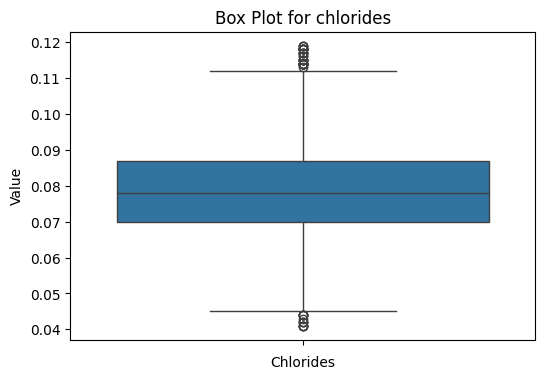

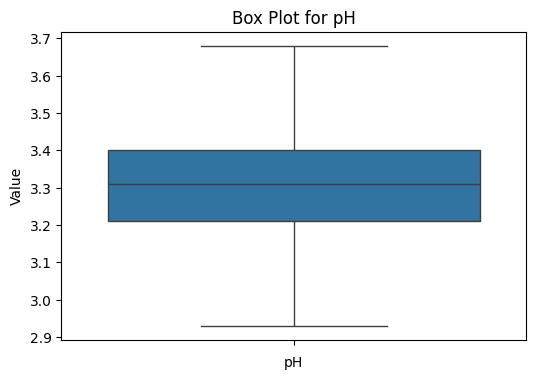

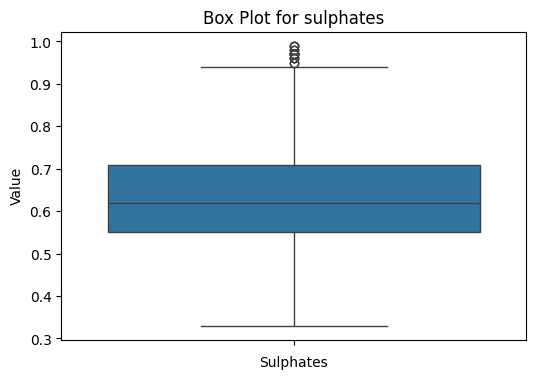

In [16]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=chlorides)
plt.title('Box Plot for chlorides')
plt.xlabel('Chlorides')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=pH)
plt.title('Box Plot for pH')
plt.xlabel('pH')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=sulphates)
plt.title('Box Plot for sulphates')
plt.xlabel('Sulphates')
plt.ylabel('Value')
plt.show()

In [17]:
def general_info(x):
  print("-"*14)
  print("Max: ", max(x))
  print("Min: ", round(min(x), 3))
  print("Median: ", statistics.median(x))

  print("-"*14)

  for i in range(1, 4):
    q = 0.25 * i
    print("Quantile ", q, " : ", x.quantile(q))

  print("-"*14)

  for i in range(1, 10):
    d = 0.1 * i
    print("Decile ", round(d, 1), " : ", x.quantile(d))

  print("-"*14)

print("Chlorides: ")
general_info(chlorides)
print("pH: ")
general_info(pH)
print("Sulphates: ")
general_info(sulphates)



Chlorides: 
--------------
Max:  0.119
Min:  0.041
Median:  0.078
--------------
Quantile  0.25  :  0.07
Quantile  0.5  :  0.078
Quantile  0.75  :  0.087
--------------
Decile  0.1  :  0.06
Decile  0.2  :  0.067
Decile  0.3  :  0.071
Decile  0.4  :  0.075
Decile  0.5  :  0.078
Decile  0.6  :  0.081
Decile  0.7  :  0.085
Decile  0.8  :  0.09
Decile  0.9  :  0.098
--------------
pH: 
--------------
Max:  3.68
Min:  2.93
Median:  3.31
--------------
Quantile  0.25  :  3.21
Quantile  0.5  :  3.31
Quantile  0.75  :  3.4
--------------
Decile  0.1  :  3.13
Decile  0.2  :  3.19
Decile  0.3  :  3.23
Decile  0.4  :  3.28
Decile  0.5  :  3.31
Decile  0.6  :  3.35
Decile  0.7  :  3.38
Decile  0.8  :  3.42
Decile  0.9  :  3.5
--------------
Sulphates: 
--------------
Max:  0.99
Min:  0.33
Median:  0.62
--------------
Quantile  0.25  :  0.55
Quantile  0.5  :  0.62
Quantile  0.75  :  0.71
--------------
Decile  0.1  :  0.5
Decile  0.2  :  0.54
Decile  0.3  :  0.56
Decile  0.4  :  0.59
Decile  0.5  :

In [18]:
def central_char(x):
  print("-"*14)
  print("Expected value: ", statistics.mean(x))
  print("Geometric mean: ", statistics.geometric_mean(x))
  print("Harmonic mean: ", statistics.harmonic_mean(x))
  print("Moda: ", statistics.multimode(x))
  print("-"*14)

print("Chlorides: ")
central_char(chlorides)
print("pH: ")
central_char(pH)
print("Sulphates: ")
central_char(sulphates)

Chlorides: 
--------------
Expected value:  0.07875588433086751
Geometric mean:  0.0773199242756907
Harmonic mean:  0.07582915787835671
Moda:  [0.08]
--------------
pH: 
--------------
Expected value:  3.308772378516624
Geometric mean:  3.305787827126788
Harmonic mean:  3.3027990109549887
Moda:  [3.3]
--------------
Sulphates: 
--------------
Expected value:  0.6364155844155844
Geometric mean:  0.6253477973353126
Harmonic mean:  0.6146673873274582
Moda:  [0.6]
--------------


In [19]:
def dispersal_char(x):
  print("-"*14)
  print("Variance: ", statistics.variance(x))
  print("Standard Deviation: ", statistics.stdev(x))
  print("Coefficient of Variance: ", (statistics.stdev(x)/statistics.mean(x) * 100), "%")
  print("Probabilistic Deviation: ", 0.5*(x.quantile(0.75) - x.quantile(0.25)))
  print("Range of Sample: ", max(x) - min(x))
  print("Concentration Interval of Distribution: ", (statistics.mean(x) - 3 * statistics.stdev(x)),
        "-", (statistics.mean(x) + 3 * statistics.stdev(x)))
  print("-"*14)

print("Chlorides: ")
dispersal_char(chlorides)
print("pH: ")
dispersal_char(pH)
print("Sulphates: ")
dispersal_char(sulphates)


Chlorides: 
--------------
Variance:  0.00022097334186548103
Standard Deviation:  0.014865172110186987
Coefficient of Variance:  18.874998657542527 %
Probabilistic Deviation:  0.008499999999999994
Range of Sample:  0.0780000000000001
Concentration Interval of Distribution:  0.03416036800030655 - 0.12335140066142847
--------------
pH: 
--------------
Variance:  0.019739758775912934
Standard Deviation:  0.14049825186070086
Coefficient of Variance:  4.246235031848534 %
Probabilistic Deviation:  0.09499999999999997
Range of Sample:  0.75
Concentration Interval of Distribution:  2.8872776229345214 - 3.730267134098727
--------------
Sulphates: 
--------------
Variance:  0.014632107879125422
Standard Deviation:  0.12096325011806447
Coefficient of Variance:  19.006959144337124 %
Probabilistic Deviation:  0.07999999999999996
Range of Sample:  0.6599999999999999
Concentration Interval of Distribution:  0.273525834061391 - 0.9993053347697778
--------------


In [20]:
print("Skewness for Chlorides: ", skew(chlorides))
print("Skewness for pH: ", skew(pH))
print("Skewness for Sulphates: ", skew(sulphates))

Skewness for Chlorides:  0.19149117942695665
Skewness for pH:  0.030755054823969594
Skewness for Sulphates:  0.5858272358069182


In [21]:
print("Kurtosis for Chlorides: ", kurtosis(chlorides))
print("Kurtosis for pH: ", kurtosis(pH))
print("Kurtosis for Sulphates: ", kurtosis(sulphates))

Kurtosis for Chlorides:  0.1272466638326022
Kurtosis for pH:  -0.23030766450132756
Kurtosis for Sulphates:  -0.12998512661379058


In [22]:
stat1, p_val1 = kstest(chlorides, "norm")
stat2, p_val2 = kstest(pH, "norm")
stat3, p_val3 = kstest(sulphates, "norm")

print("For chlorides: ")
print("Statistic: ", stat1, "\np-value: ", p_val1)
print("-"*14)
print("For pH: ")
print("Statistic: ", stat2, "\np-value: ", round(p_val2, 5))
print("-"*14)
print("For sulphates: ")
print("Statistic: ", stat3, "\np-value: ", p_val3)

For chlorides: 
Statistic:  0.5163520520682413 
p-value:  0.0
--------------
For pH: 
Statistic:  0.9983051899807227 
p-value:  0.0
--------------
For sulphates: 
Statistic:  0.6547138677162306 
p-value:  0.0


In [23]:
s1, p1 = shapiro(chlorides)
s2, p2 = shapiro(pH)
s3, p3 = shapiro(sulphates)

print("For chlorides: ")
print("Statistic: ", s1, "\np-value: ", p1)
print("-"*14)
print("For pH: ")
print("Statistic: ", s2, "\np-value: ", p2)
print("-"*14)
print("For sulphates: ")
print("Statistic: ", s3, "\np-value: ", p3)

For chlorides: 
Statistic:  0.9912129630795583 
p-value:  9.07582990238058e-08
--------------
For pH: 
Statistic:  0.9970899577278729 
p-value:  0.0052645327698861875
--------------
For sulphates: 
Statistic:  0.9691276388368203 
p-value:  1.2259063185779397e-17


In [24]:
chl_norm1, best_lambda = boxcox(chlorides)
pH_norm1, best_lambda = boxcox(pH)
sul_norm1, best_lambda = boxcox(sulphates)

In [25]:
chl_norm1 = np.log(chlorides)
pH_norm1 = np.log(pH)
sul_norm1 = np.log(sulphates)

In [26]:
s1, p1 = shapiro(chl_norm1)
s2, p2 = shapiro(pH_norm1)
s3, p3 = shapiro(sul_norm1)

print("For chlorides: ")
print("Statistic: ", s1, "\np-value: ", p1)
print("-"*14)
print("For pH: ")
print("Statistic: ", s2, "\np-value: ", p2)
print("-"*14)
print("For sulphates: ")
print("Statistic: ", s3, "\np-value: ", p3)

For chlorides: 
Statistic:  0.9832911008942912 
p-value:  4.127570529818875e-12
--------------
For pH: 
Statistic:  0.996806873177082 
p-value:  0.0026196678112443807
--------------
For sulphates: 
Statistic:  0.9913527921872384 
p-value:  7.035006273913902e-08


In [27]:
chl_norm2 = np.sqrt(chlorides)
pH_norm2 = np.sqrt(pH)
sul_norm2 = np.sqrt(sulphates)

In [28]:
s1, p1 = shapiro(chl_norm2)
s2, p2 = shapiro(pH_norm2)
s3, p3 = shapiro(sul_norm2)

print("For chlorides: ")
print("Statistic: ", s1, "\np-value: ", p1)
print("-"*14)
print("For pH: ")
print("Statistic: ", s2, "\np-value: ", p2)
print("-"*14)
print("For sulphates: ")
print("Statistic: ", s3, "\np-value: ", p3)

For chlorides: 
Statistic:  0.9924890498223529 
p-value:  7.085288607185494e-07
--------------
For pH: 
Statistic:  0.9971421682260191 
p-value:  0.005997019782284366
--------------
For sulphates: 
Statistic:  0.9831922445114037 
p-value:  1.981661613133929e-12


In [29]:
chl_norm3 = 1 / (chlorides)
pH_norm3 = 1 / pH
sul_norm3 = 1 / sulphates

In [30]:
s1, p1 = shapiro(chl_norm3)
s2, p2 = shapiro(pH_norm3)
s3, p3 = shapiro(sul_norm3)

print("For chlorides: ")
print("Statistic: ", s1, "\np-value: ", p1)
print("-"*14)
print("For pH: ")
print("Statistic: ", s2, "\np-value: ", p2)
print("-"*14)
print("For sulphates: ")
print("Statistic: ", s3, "\np-value: ", p3)

For chlorides: 
Statistic:  0.9326676621237769 
p-value:  2.320281973238108e-25
--------------
For pH: 
Statistic:  0.9949694231547812 
p-value:  4.11512331286902e-05
--------------
For sulphates: 
Statistic:  0.9872742351844507 
p-value:  2.2207969969085332e-10


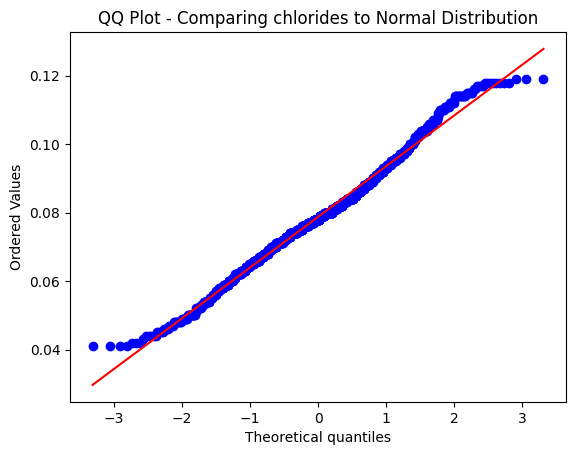

In [31]:
probplot(chlorides.to_numpy(), dist="norm", plot=plt)
plt.title('QQ Plot - Comparing chlorides to Normal Distribution')
plt.show()

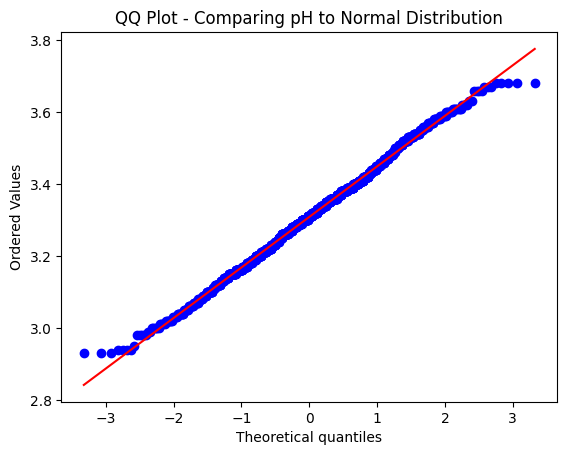

In [32]:
probplot(pH.to_numpy(), dist="norm", plot=plt)
plt.title('QQ Plot - Comparing pH to Normal Distribution')
plt.show()

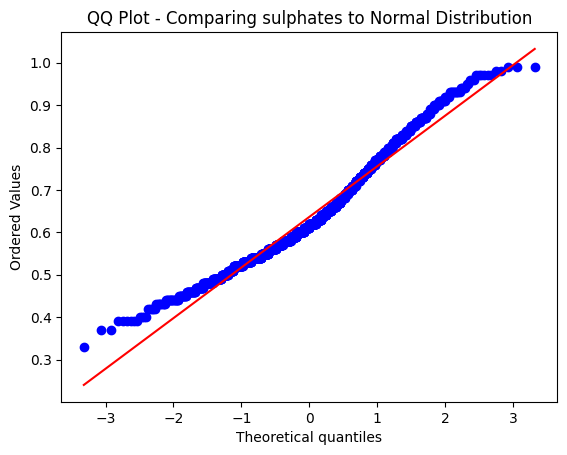

In [33]:
probplot(sulphates.to_numpy(), dist="norm", plot=plt)
plt.title('QQ Plot - Comparing sulphates to Normal Distribution')
plt.show()